In [138]:
import pandas as pd
from datetime import datetime,timedelta
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

<h2>Load final data and preprocess the data to pick only the relevant features.</h2>

In [103]:
#Change the change field from string to datetime.
to_yymmdd = lambda dt: datetime.strptime(dt, "%Y-%m-%d")
df_data=pd.read_csv('../Consolidated.txt',delimiter='|',\
                    infer_datetime_format=True,keep_date_col=True,\
                    converters={'loan_grant_date':to_yymmdd,'create_date':to_yymmdd,'birthdate':to_yymmdd})

In [104]:
# df_data['loan_expiry']=df_data.apply(lambda rec: rec['loan_grant_date']+ pd.offsets.MonthEnd(rec['duration']), axis=1)
df_data['loan_age']=df_data.apply(lambda rec: (datetime.now()-rec['loan_grant_date']).days-7691, axis=1)
df_data['account_age']=df_data.apply(lambda rec: (datetime.now()-rec['create_date']).days-7691, axis=1)
df_data['client_age']=df_data.apply(lambda rec: (datetime.now()-rec['birthdate']).days-7691, axis=1)
df_data=df_data[['loan_amount', 'duration',
       'installment_amt', 'AccountStatus', 'PaymentStatus',
       'sex', 'credit', 'debit', 'balance',
       'cash credit', 'cash debit', 'cc debit', 'interest credit',
       'oth credit', 'oth debit', 'trans_freq', 'O/Age Pension', 'insurance',
       'interest cr', 'loan repay', 'negative bal fine', 'regular', 'stmt dt',
       'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12',
       'A13', 'A14', 'A15', 'A16', 'classic', 'gold', 'junior',
       'loan_age','account_age','client_age']]
df_data.head()

,loan_amount,duration,installment_amt,AccountStatus,PaymentStatus,sex,credit,debit,balance,cash credit,...,A13,A14,A15,A16,classic,gold,junior,loan_age,account_age,client_age
0,96396,12,8033.0,CLOSED,NOTPAYED,female,154,249,5903.1,2047725.0,...,3.67,100,2985.0,2804,0.0,0.0,0.0,2005,2110,18790
1,165960,36,4610.0,CLOSED,PAYED,male,188,445,93628.6,2411437.0,...,2.31,117,2854.0,2618,0.0,0.0,0.0,1999,2147,11119
2,47016,12,3918.0,CLOSED,PAYED,female,191,279,75197.4,3189134.0,...,2.31,117,2854.0,2618,0.0,0.0,0.0,1848,2087,14975
3,69360,48,1445.0,CLOSED,PAYED,male,140,263,37001.8,896219.0,...,2.31,117,2854.0,2618,0.0,0.0,0.0,1663,2113,20975
4,390096,48,8127.0,ACTIVE,NODEBT,male,62,109,80446.6,761027.0,...,2.31,117,2854.0,2618,0.0,0.0,1.0,701,864,7401


<h2>Treat categorical Variables</h2>

In [105]:
account_status={'CLOSED':0,'ACTIVE':1}
df_data['AccountStatus']=df_data['AccountStatus'].replace(account_status)
PaymentStatus={'PAYED':0,'NOTPAYED':1,'NODEBT':0,'INDEBT':1}
df_data['PaymentStatus']=df_data['PaymentStatus'].replace(PaymentStatus)
df_data=pd.concat([df_data,pd.get_dummies(df_data.sex)],axis=1).drop('sex',axis=1)
df_data=pd.concat([df_data,pd.get_dummies(df_data.A2)],axis=1).drop('A2',axis=1)
df_data=pd.concat([df_data,pd.get_dummies(df_data.A3)],axis=1).drop('A3',axis=1)

<h2>Feature Selection, based on Feature importance attribute of a model.</h2>

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


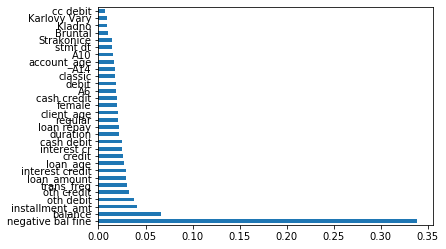

In [214]:
X=df_data.drop(['PaymentStatus'],axis=1)
y=df_data.PaymentStatus
model = ExtraTreesClassifier()
model.fit(X,y)
# print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()

<h2>Selected top 30 important features.</h2>

In [202]:
df_data=df_data[feat_importances.sort_values(ascending=False)[:30].index.to_list()+['PaymentStatus']]

<h2>Split the data in test train</h2>

In [203]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop('PaymentStatus',axis=1), df_data['PaymentStatus'],test_size=0.30, random_state=12)

<h2>Find best learning rate of Gradient Boosting Classifier.</h2>

Learning rate:  0.05
Accuracy score (training): 0.872
Accuracy score (validation): 0.927
Learning rate:  0.075
Accuracy score (training): 0.878
Accuracy score (validation): 0.927
Learning rate:  0.1
Accuracy score (training): 0.883
Accuracy score (validation): 0.927
Learning rate:  0.25
Accuracy score (training): 0.960
Accuracy score (validation): 0.946
Learning rate:  0.3
Accuracy score (training): 0.956
Accuracy score (validation): 0.951
Learning rate:  0.35
Accuracy score (training): 0.943
Accuracy score (validation): 0.937
Learning rate:  0.4
Accuracy score (training): 0.948
Accuracy score (validation): 0.937
Learning rate:  0.45
Accuracy score (training): 0.948
Accuracy score (validation): 0.941
Learning rate:  0.5
Accuracy score (training): 0.956
Accuracy score (validation): 0.917
Learning rate:  0.75
Accuracy score (training): 0.987
Accuracy score (validation): 0.932
Learning rate:  1
Accuracy score (training): 0.992
Accuracy score (validation): 0.941


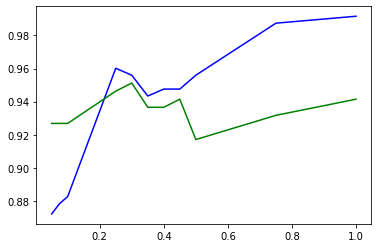

In [212]:
lr_list = [0.05, 0.075, 0.1, 0.25,0.30,0.35,0.40,0.45, 0.5, 0.75, 1]
plt_data={'learning_rate':[],'train_accuracy':[],'test_accuracy':[]}
for learning_rate in lr_list:
    gbm_clf = GradientBoostingClassifier(n_estimators=20, learning_rate=learning_rate, max_features=2, max_depth=2, random_state=0)
    gbm_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbm_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbm_clf.score(X_test, y_test)))
    plt_data['learning_rate'].append(learning_rate)
    plt_data['train_accuracy'].append(gbm_clf.score(X_train, y_train))
    plt_data['test_accuracy'].append(gbm_clf.score(X_test, y_test))
plt_data=pd.DataFrame(plt_data)
plt.plot(plt_data.learning_rate,plt_data.train_accuracy,'blue')
plt.plot(plt_data.learning_rate,plt_data.test_accuracy,'green')

<h2>selected 0.25 as learning rate of Gradient Boosting Classifier.</h2>

<h3>check other measurements for the model</h3>

In [205]:
gbm_clf_tuned = GradientBoostingClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
gbm_clf_tuned.fit(X_train, y_train)
predictions = gbm_clf_tuned.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[189   1]
 [ 10   5]]
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       190
           1       0.83      0.33      0.48        15

   micro avg       0.95      0.95      0.95       205
   macro avg       0.89      0.66      0.72       205
weighted avg       0.94      0.95      0.94       205



<h2>Find best learning rate of Xtreme Gradient Boosting Classifier.</h2>

Learning rate:  0.05
Accuracy score (training): 0.985
Accuracy score (validation): 0.980
Learning rate:  0.075
Accuracy score (training): 0.985
Accuracy score (validation): 0.980
Learning rate:  0.1
Accuracy score (training): 0.990
Accuracy score (validation): 0.985
Learning rate:  0.25
Accuracy score (training): 0.990
Accuracy score (validation): 0.985
Learning rate:  0.3
Accuracy score (training): 0.990
Accuracy score (validation): 0.985
Learning rate:  0.35
Accuracy score (training): 0.994
Accuracy score (validation): 0.985
Learning rate:  0.4
Accuracy score (training): 0.994
Accuracy score (validation): 0.985
Learning rate:  0.45
Accuracy score (training): 0.994
Accuracy score (validation): 0.980
Learning rate:  0.5
Accuracy score (training): 0.996
Accuracy score (validation): 0.985
Learning rate:  0.75
Accuracy score (training): 1.000
Accuracy score (validation): 0.980
Learning rate:  1
Accuracy score (training): 1.000
Accuracy score (validation): 0.980


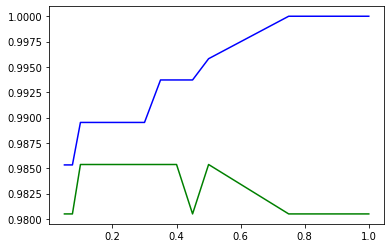

In [208]:
lr_list = [0.05, 0.075, 0.1, 0.25,0.30,0.35,0.40,0.45, 0.5, 0.75, 1]
plt_data={'learning_rate':[],'train_accuracy':[],'test_accuracy':[]}
for learning_rate in lr_list:
    gbm_clf = XGBClassifier(n_estimators=20, learning_rate=learning_rate, max_depth=2, random_state=0)
    gbm_clf.fit(X_train, y_train)

    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gbm_clf.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gbm_clf.score(X_test, y_test)))
    plt_data['learning_rate'].append(learning_rate)
    plt_data['train_accuracy'].append(gbm_clf.score(X_train, y_train))
    plt_data['test_accuracy'].append(gbm_clf.score(X_test, y_test))
plt_data=pd.DataFrame(plt_data)
plt.plot(plt_data.learning_rate,plt_data.train_accuracy,'blue')
plt.plot(plt_data.learning_rate,plt_data.test_accuracy,'green')

<h2>selected learning rate 0.25 of Gradient Boosting Classifier.</h2>

In [209]:
xgbm_clf_tuned = XGBClassifier(n_estimators=20, learning_rate=0.25, max_features=2, max_depth=2, random_state=0)
xgbm_clf_tuned.fit(X_train, y_train)
predictions = xgbm_clf_tuned.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[188   2]
 [  1  14]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       190
           1       0.88      0.93      0.90        15

   micro avg       0.99      0.99      0.99       205
   macro avg       0.93      0.96      0.95       205
weighted avg       0.99      0.99      0.99       205

